### Importação dos dados



In [403]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 0. Tratamento de Dados

In [404]:
COLUMN_MAP = {
    'Produto': 'produto',
    'Categoria do Produto': 'categoria_produto',
    'Preço': 'valor_produto',
    'Frete': 'valor_frete',
    'Data da Compra': 'data_compra',
    'Vendedor': 'nome_vendedor',
    'Local da compra': 'estado_compra',
    'Avaliação da compra': 'avaliacao_compra',
    'Tipo de pagamento': 'tipo_pagamento',
    'Quantidade de parcelas': 'quantidade_parcelas',
    'lat': 'latitude',
    'lon': 'longitude',
}

In [405]:
def tratar_loja(df):
    df = df.rename(columns=COLUMN_MAP)

    df['data_original'] = df['data_compra']
    df['data_compra'] = pd.to_datetime(
        df['data_compra'], format='%d/%m/%Y', errors='coerce'
    )

    df['valor_total'] = df['valor_produto'] + df['valor_frete']

    return df

In [406]:
def resumo_qualidade(df, nome_loja):
  print(f"\n📊 {nome_loja} - Resumo de Qualidade")
  print(f"Linhas: {df.shape[0]} | Colunas: {df.shape[1]}")
  print(f"Nulos:\n{df.isnull().sum()}")
  print(f"Avaliação min/max: {df['avaliacao_compra'].min()} / {df['avaliacao_compra'].max()}")
  print(f"Data de compra mais antiga: {df['data_compra'].min()}")
  print(f"Data de compra mais recente: {df['data_compra'].max()}")
  print(f"Tipo de pagamentos: {df['tipo_pagamento'].unique()}")

In [407]:
def validar_loja(df, nome_loja):
  print(f"\n📊 {nome_loja} - Validação")

  coordenadas_invalidas = (
    loja['latitude'].isna() |
    loja['longitude'].isna() |
    (loja['latitude'] < -90) | (loja['latitude'] > 90) |
    (loja['longitude'] < -180) | (loja['longitude'] > 180)
  )

  print(f"Coordenadas inválidas: {coordenadas_invalidas.sum()}")
  print(f"Preço inválido: {(df['valor_produto'] <= 0).sum()}")
  print(f"Frete inválido: {(df['valor_frete'] < 0).sum()}")

In [408]:
loja = tratar_loja(loja)
loja2 = tratar_loja(loja2)
loja3 = tratar_loja(loja3)
loja4 = tratar_loja(loja4)

In [409]:
resumo_qualidade(loja, "Loja 1")
validar_loja(loja, "Loja 1")


📊 Loja 1 - Resumo de Qualidade
Linhas: 2359 | Colunas: 14
Nulos:
produto                0
categoria_produto      0
valor_produto          0
valor_frete            0
data_compra            0
nome_vendedor          0
estado_compra          0
avaliacao_compra       0
tipo_pagamento         0
quantidade_parcelas    0
latitude               0
longitude              0
data_original          0
valor_total            0
dtype: int64
Avaliação min/max: 1 / 5
Data de compra mais antiga: 2020-01-01 00:00:00
Data de compra mais recente: 2023-03-31 00:00:00
Tipo de pagamentos: ['cartao_credito' 'boleto' 'cupom' 'cartao_debito']

📊 Loja 1 - Validação
Coordenadas inválidas: 0
Preço inválido: 0
Frete inválido: 0


In [410]:
resumo_qualidade(loja2, "Loja 2")
validar_loja(loja2, "Loja 2")


📊 Loja 2 - Resumo de Qualidade
Linhas: 2359 | Colunas: 14
Nulos:
produto                0
categoria_produto      0
valor_produto          0
valor_frete            0
data_compra            0
nome_vendedor          0
estado_compra          0
avaliacao_compra       0
tipo_pagamento         0
quantidade_parcelas    0
latitude               0
longitude              0
data_original          0
valor_total            0
dtype: int64
Avaliação min/max: 1 / 5
Data de compra mais antiga: 2020-01-01 00:00:00
Data de compra mais recente: 2023-03-31 00:00:00
Tipo de pagamentos: ['boleto' 'cartao_credito' 'cupom' 'cartao_debito']

📊 Loja 2 - Validação
Coordenadas inválidas: 0
Preço inválido: 0
Frete inválido: 0


In [411]:
resumo_qualidade(loja3, "Loja 3")
validar_loja(loja3, "Loja 3")


📊 Loja 3 - Resumo de Qualidade
Linhas: 2359 | Colunas: 14
Nulos:
produto                0
categoria_produto      0
valor_produto          0
valor_frete            0
data_compra            0
nome_vendedor          0
estado_compra          0
avaliacao_compra       0
tipo_pagamento         0
quantidade_parcelas    0
latitude               0
longitude              0
data_original          0
valor_total            0
dtype: int64
Avaliação min/max: 1 / 5
Data de compra mais antiga: 2020-01-01 00:00:00
Data de compra mais recente: 2023-03-31 00:00:00
Tipo de pagamentos: ['cartao_credito' 'boleto' 'cupom' 'cartao_debito']

📊 Loja 3 - Validação
Coordenadas inválidas: 0
Preço inválido: 0
Frete inválido: 0


In [412]:
resumo_qualidade(loja4, "Loja 4")
validar_loja(loja4, "Loja 4")


📊 Loja 4 - Resumo de Qualidade
Linhas: 2358 | Colunas: 14
Nulos:
produto                0
categoria_produto      0
valor_produto          0
valor_frete            0
data_compra            0
nome_vendedor          0
estado_compra          0
avaliacao_compra       0
tipo_pagamento         0
quantidade_parcelas    0
latitude               0
longitude              0
data_original          0
valor_total            0
dtype: int64
Avaliação min/max: 1 / 5
Data de compra mais antiga: 2020-01-01 00:00:00
Data de compra mais recente: 2023-03-30 00:00:00
Tipo de pagamentos: ['cartao_credito' 'boleto' 'cupom' 'cartao_debito']

📊 Loja 4 - Validação
Coordenadas inválidas: 0
Preço inválido: 0
Frete inválido: 0


**CONCLUSÃO:**
1. Não temos valores nulos(NaN) em nenhuma coluna.
2. 'data_compra' foi convertido de Object para Datetime para melhor tratamento dos dados.
3. Todas as coordenadas são válidas (latitude e longitude).
4. O intervalo de compras do dataset não ultrapassa o dia atual.
5. O preço e o valor do frete são válidos.
6. a coluna 'valor_total' foi adicionada somando preço e frete.
7. Todas as lojas usam apenas 4 tipos de pagamento.

**OBSERVAÇÕES:**
1. Na loja 2 a maioria das datas deram problema na conversão de Object para Datetime, foi resolvido especificando o formato da data.

#1. Análise do faturamento

In [413]:
def calcular_faturamento(df):
  faturamento = df['valor_produto'].sum()
  return faturamento

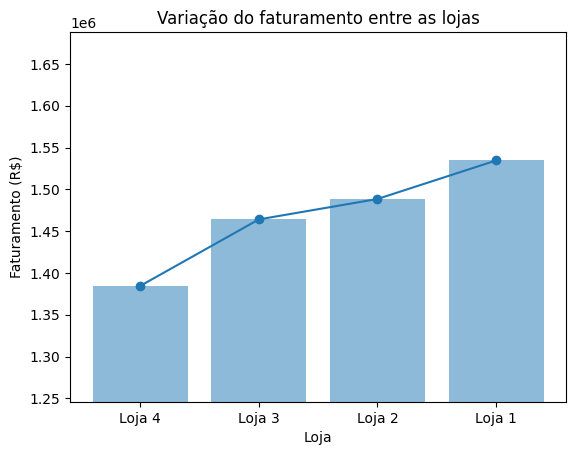

In [414]:
df_faturamento = {
  "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
  "Faturamento": [
    calcular_faturamento(loja),
    calcular_faturamento(loja2),
    calcular_faturamento(loja3),
    calcular_faturamento(loja4),
  ]
}

df_faturamento_resumo = pd.DataFrame(df_faturamento)
df_faturamento_ord = df_faturamento_resumo.sort_values("Faturamento")

y_min = df_faturamento_ord["Faturamento"].min()
y_max = df_faturamento_ord["Faturamento"].max()

plt.figure()
plt.bar(df_faturamento_ord["Loja"], df_faturamento_ord["Faturamento"], alpha=0.5)
plt.plot(df_faturamento_ord["Loja"], df_faturamento_ord["Faturamento"], marker="o")
plt.ylim(y_min * 0.90, y_max * 1.10)
plt.title("Variação do faturamento entre as lojas")
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.show()

**CONCLUSÃO**:
- A **loja 1** teve o maior faturamento.
- A **loja 4** teve o menor faturamento.

#2. Vendas por Categoria

In [415]:
def categorias_mais_vendidas(df, nome_loja, top_n=5):
  vendas_por_cat = (
      df
      .groupby("categoria_produto", dropna=False)
      .size()
      .sort_values(ascending=False)
      .head(top_n)
  )

  vendas_por_cat = vendas_por_cat[::-1]

  ax = vendas_por_cat.plot(kind="barh")

  for i, v in enumerate(vendas_por_cat):
      ax.text(v, i, v, va="center")

  plt.title(f"Categorias MAIS vendidas - {nome_loja}")
  plt.xlabel("Quantidade de vendas")
  plt.ylabel("Categoria")
  plt.show()

  return vendas_por_cat

In [416]:
def categorias_menos_vendidas(df, nome_loja, top_n=5):
  vendas_por_cat = (
      df
      .groupby("categoria_produto", dropna=False)
      .size()
      .sort_values(ascending=True)
      .head(top_n)
  )

  vendas_por_cat = vendas_por_cat[::-1]

  ax = vendas_por_cat.plot(kind="barh")

  for i, v in enumerate(vendas_por_cat):
      ax.text(v, i, v, va="center")

  plt.title(f"Categorias MENOS vendidas - {nome_loja}")
  plt.xlabel("Quantidade de vendas")
  plt.ylabel("Categoria")
  plt.show()

  return vendas_por_cat

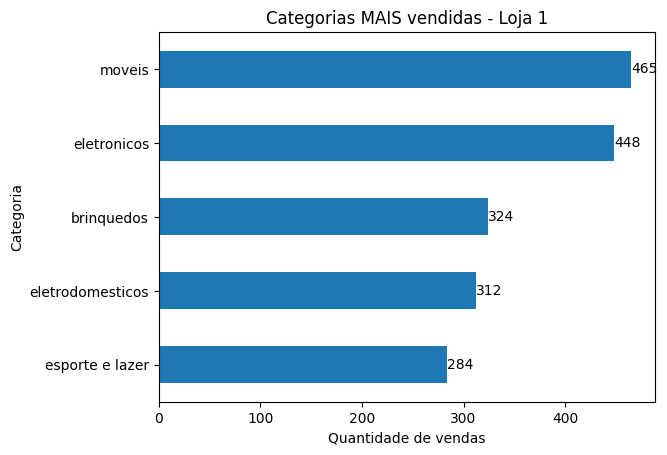

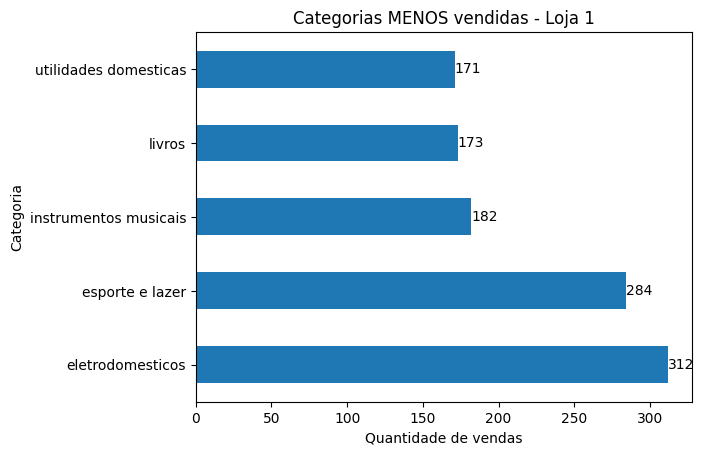

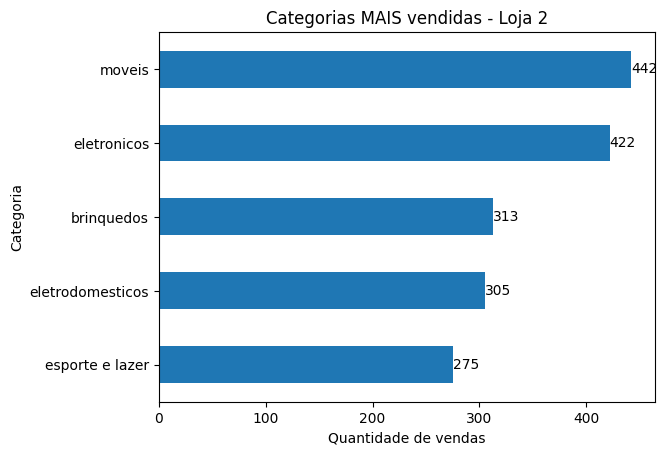

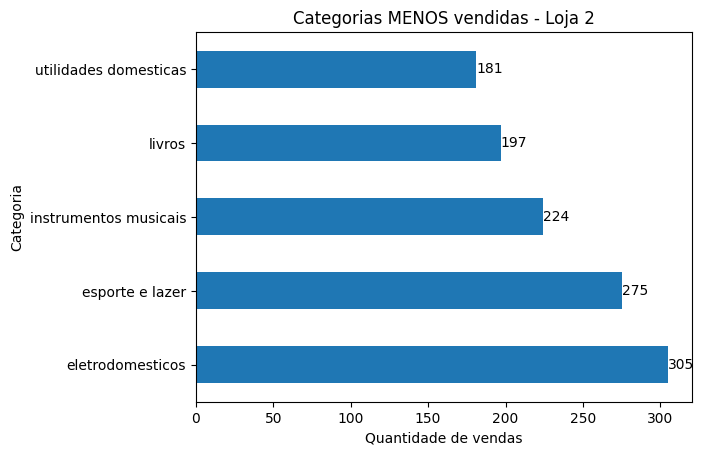

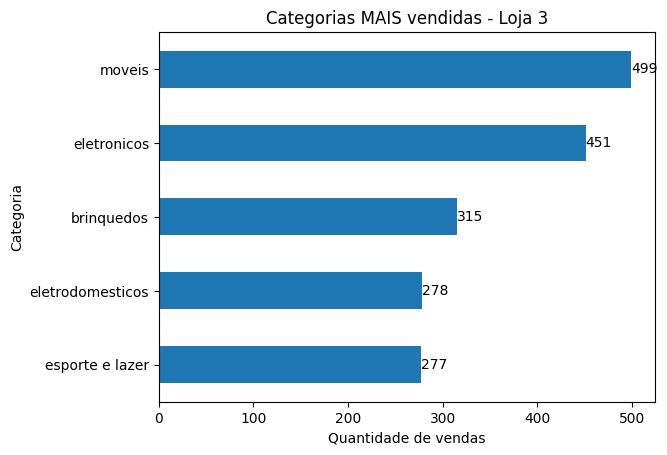

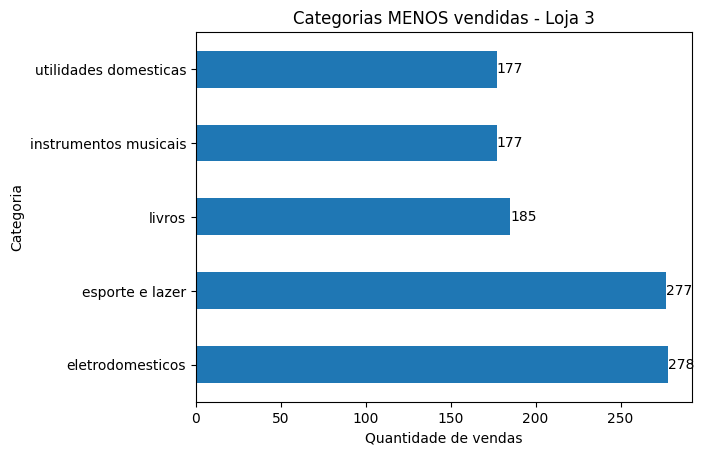

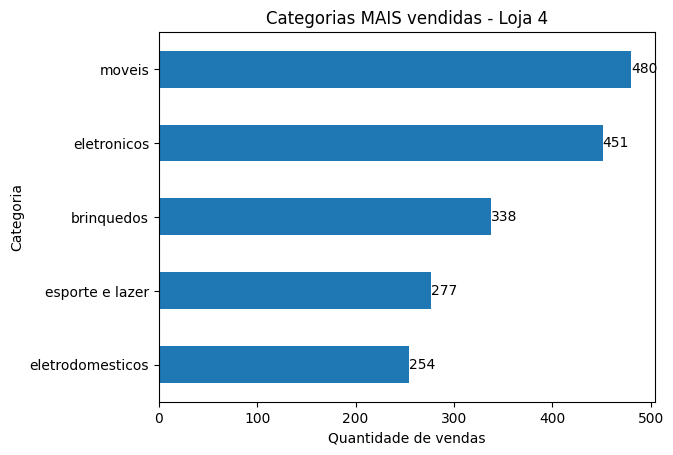

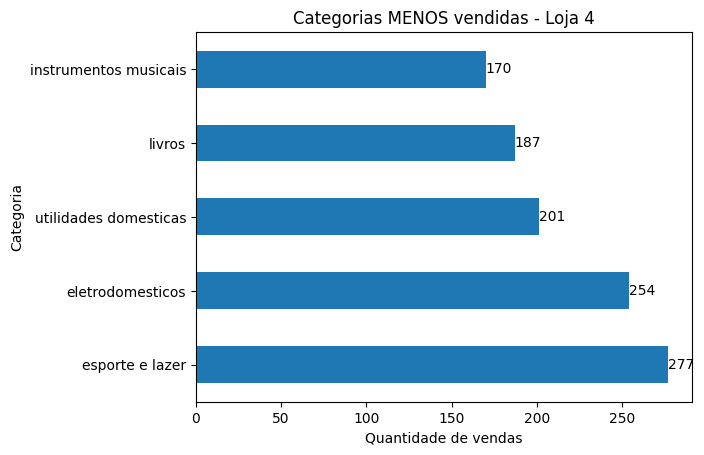

,0
categoria_produto,
esporte e lazer,277
eletrodomesticos,254
utilidades domesticas,201
livros,187
instrumentos musicais,170


In [417]:
categorias_mais_vendidas(loja, "Loja 1")
categorias_menos_vendidas(loja, "Loja 1")

categorias_mais_vendidas(loja2, "Loja 2")
categorias_menos_vendidas(loja2, "Loja 2")

categorias_mais_vendidas(loja3, "Loja 3")
categorias_menos_vendidas(loja3, "Loja 3")

categorias_mais_vendidas(loja4, "Loja 4")
categorias_menos_vendidas(loja4, "Loja 4")

**CONCLUSÃO**:
- As categorias **móveis**, **eletronicos** e **brinquedos** ocuparam respectivamente 1º, 2º e 3º lugar em todas as lojas.
- A categoria **eletrodomésticos** ficou em 4º lugar na maioria das lojas com exceção da **Loja 4**.
- A categoria **esporte e lazer** ficou em 5º lugar na maioria das lojas com exceção da **Loja 4**.
- A maior quantidade de vendas foi de **móveis** na **Loja 3**, sendo 499.

# 3. Média de Avaliação das Lojas


In [418]:
def media_avaliacoes(df):
  media_avaliacoes = df["avaliacao_compra"].mean()
  return round(media_avaliacoes, 2)

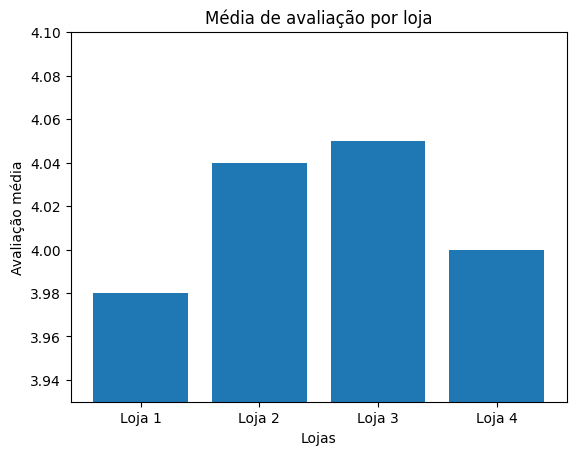

In [397]:
dados_avaliacao = {
    "Lojas": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Avaliação": [
      media_avaliacoes(loja),
      media_avaliacoes(loja2),
      media_avaliacoes(loja3),
      media_avaliacoes(loja4),
    ]
}

df_avaliacao_resumo = pd.DataFrame(dados_avaliacao)

plt.figure()
plt.bar(df_avaliacao_resumo["Lojas"], df_avaliacao_resumo["Avaliação"])
plt.ylim(
    df_avaliacao_resumo["Avaliação"].min() - 0.05,
    df_avaliacao_resumo["Avaliação"].max() + 0.05
)
plt.title("Média de avaliação por loja")
plt.xlabel("Lojas")
plt.ylabel("Avaliação média")
plt.show()

**CONCLUSÃO**:
- A **Loja 3** teve a maior média de avaliação.
- A **Loja 1** teve a menor média de avaliação.

**OBSERVAÇÃO**: Como a média das avaliações era muito similar, foram utilizados duas casas decimais após a vírgula.

# 4. Produtos Mais e Menos Vendidos

In [398]:
# def produtos_vendidos(df, nome_loja):
#   vendas = df.groupby("produto").size()

#   max_vendas = vendas.max()
#   mais_vendidos = vendas[vendas == max_vendas]

#   min_vendas = vendas.min()
#   menos_vendidos = vendas[vendas == min_vendas]

#   print(f"Estatística de vendas - {nome_loja}")
#   print("Produto(s) mais vendido(s):")
#   print(mais_vendidos)
#   print("")
#   print("Produto(s) menos vendido(s):")
#   print(menos_vendidos)
#   print("")
#   print("*****************")
#   print("")

In [399]:
def produtos_vendidos(df, nome_loja, top_n=5):
  vendas = df.groupby("produto").size().sort_values()

  menos_vendidos = vendas.head(top_n)
  mais_vendidos = vendas.tail(top_n)

  menos_vendidos = menos_vendidos[::-1]

  plt.figure()
  plt.barh(mais_vendidos.index, mais_vendidos.values)
  plt.title(f"{nome_loja} - Produtos MAIS vendidos")
  plt.xlabel("Quantidade de vendas")
  plt.ylabel("Produto")
  plt.show()

  plt.figure()
  plt.barh(menos_vendidos.index, menos_vendidos.values)
  plt.title(f"{nome_loja} - Produtos MENOS vendidos")
  plt.xlabel("Quantidade de vendas")
  plt.ylabel("Produto")
  plt.show()

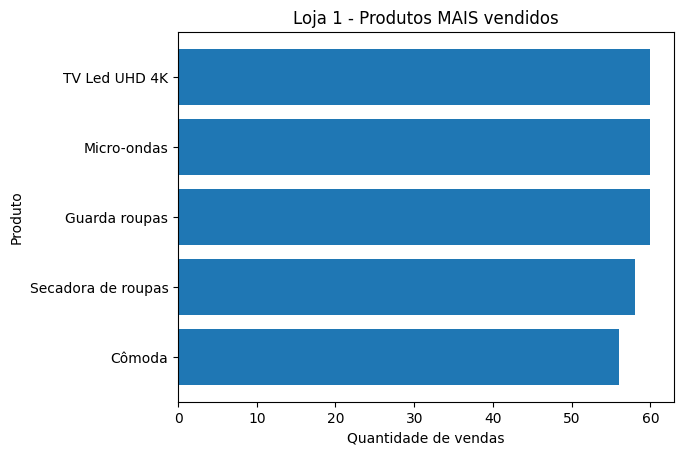

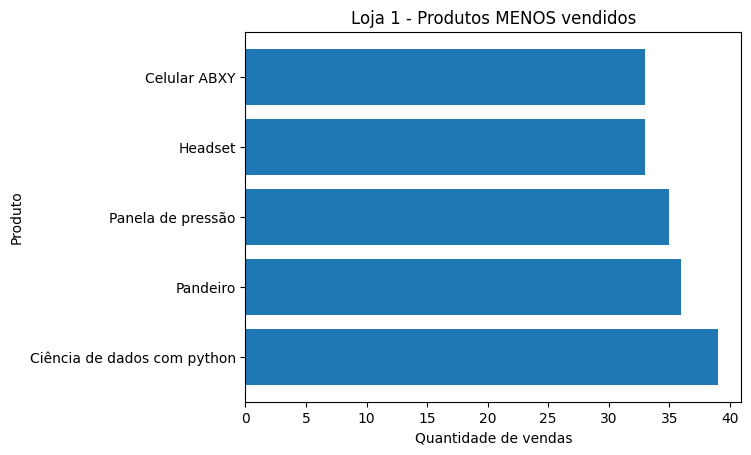

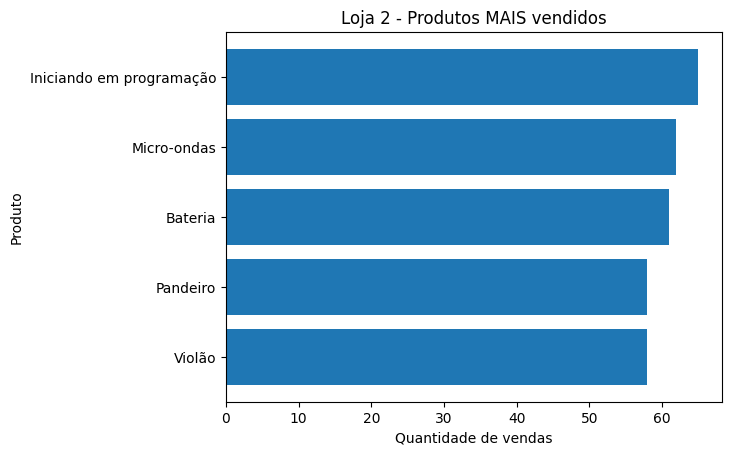

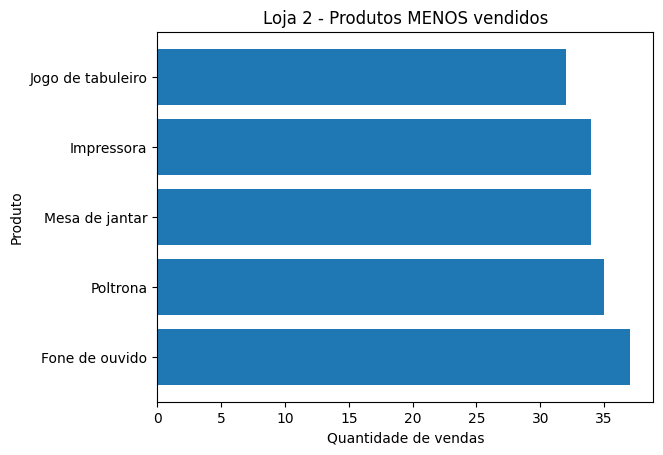

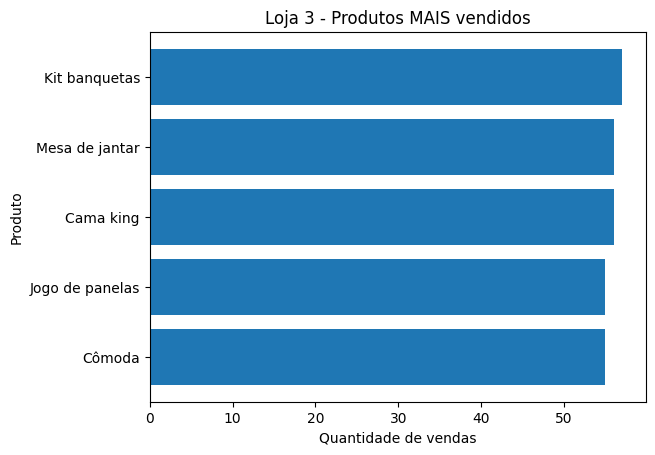

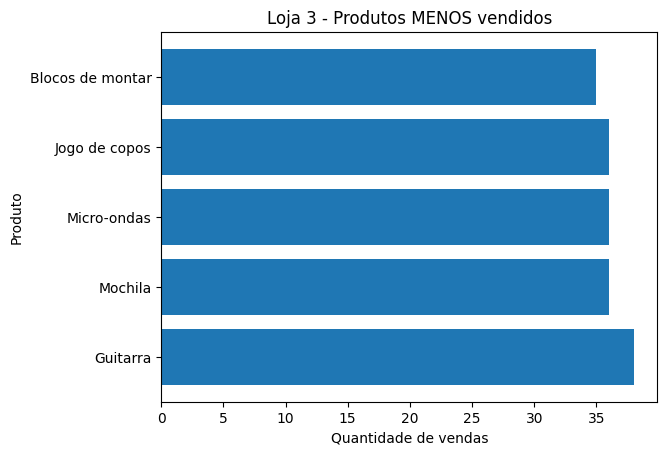

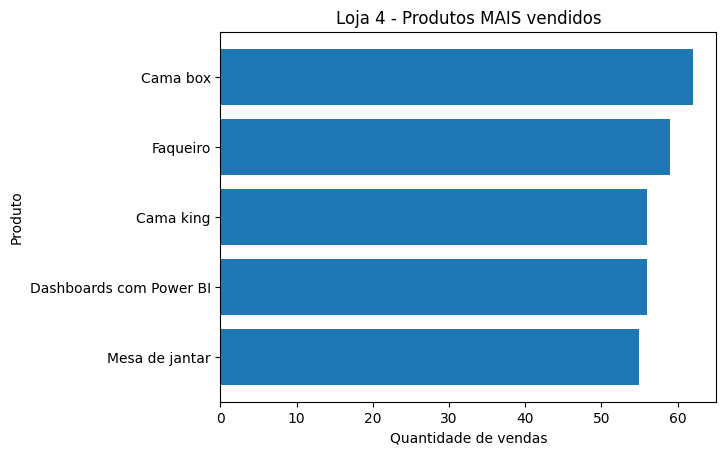

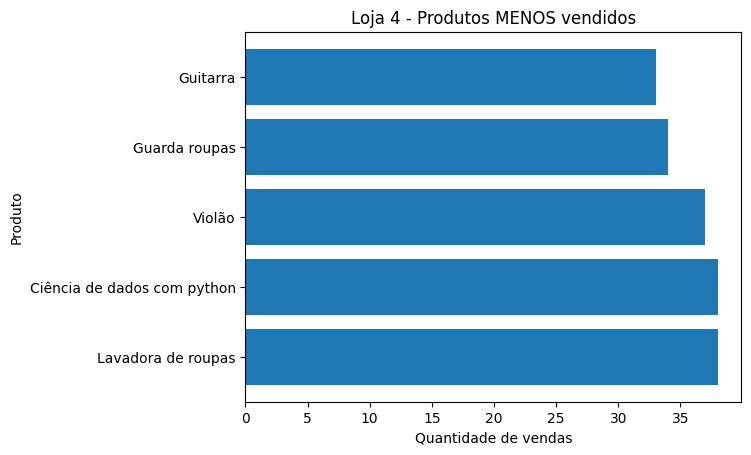

In [400]:
# dados_produtos = {
#     "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
#     "Frete médio (R$)": [
#       frete_medio(loja),
#       frete_medio(loja2),
#       frete_medio(loja3),
#       frete_medio(loja4),
#     ]
# }

produtos_vendidos(loja, "Loja 1")
produtos_vendidos(loja2, "Loja 2")
produtos_vendidos(loja3, "Loja 3")
produtos_vendidos(loja4, "Loja 4")

# 5. Frete Médio por Loja

In [401]:
def frete_medio(df):
  frete_medio = df["valor_frete"].mean()

  return round(frete_medio, 2)

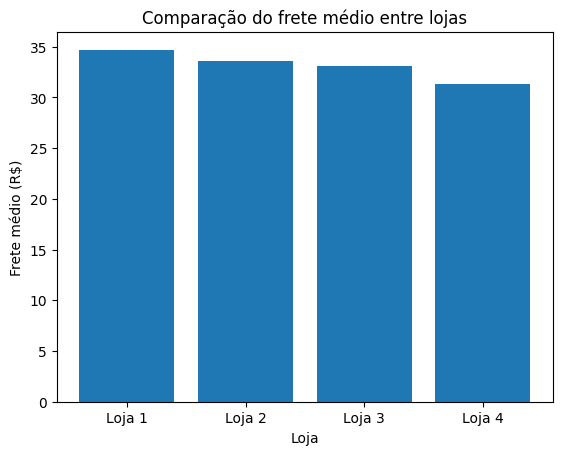

In [402]:
dados_frete = {
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Frete médio (R$)": [
      frete_medio(loja),
      frete_medio(loja2),
      frete_medio(loja3),
      frete_medio(loja4),
    ]
}

df_frete_resumo = pd.DataFrame(dados_frete)

plt.figure()
plt.bar(df_frete_resumo["Loja"], df_frete_resumo["Frete médio (R$)"])
plt.title("Comparação do frete médio entre lojas")
plt.xlabel("Loja")
plt.ylabel("Frete médio (R$)")
plt.show()

# Relatório

O objetivo desta análise foi avaliar o desempenho de quatro lojas pertencentes ao Senhor João, com o intuito de identificar qual delas apresenta os piores resultados gerais e, portanto, deve ser considerada para venda.

Para isso, foram analisados diversos indicadores relevantes, incluindo o faturamento total, a distribuição das categorias de produtos vendidas, a média das avaliações dos clientes, os produtos mais e menos vendidos e o custo médio de frete. As análises foram apoiadas por visualizações gráficas, facilitando a interpretação dos dados e a comparação entre as lojas.

<br>

### 1. Faturamento total das lojas

Conforme observado no gráfico de faturamento, a **Loja 1** apresentou o **maior** faturamento, enquanto a **Loja 4** registrou o **menor** faturamento. As demais lojas apresentaram resultados intermediários, sem grandes variações entre si.

<br>

### 2. Categorias de produtos mais e menos vendidas

Ao analisar a quantidade de produtos vendidos por categoria em cada loja, foi possível identificar padrões de consumo semelhantes entre elas. Em geral, categorias como **móveis, eletrônicos e brinquedos** se destacaram como as mais vendidas, enquanto **utilidades domésticas, livros e instrumentos musicais** apresentaram menor volume de vendas.

Após a análise, observou-se que a **Loja 2** apresenta menor volume de vendas nas categorias principais, o que pode indicar menor atratividade do seu mix de produtos em comparação às demais.

<br>

### 3. Média das avaliações dos clientes

A média das avaliações dos clientes foi utilizada como um indicador de satisfação. Os resultados mostraram que todas as lojas possuem avaliações relativamente próximas, com médias em torno de 4 estrelas.

No entanto, a **Loja 1** apresentou a menor média de avaliação, ainda que a diferença seja pequena. Esse resultado sugere que, mesmo não havendo grandes problemas de satisfação, essa loja se destaca negativamente quando comparada às demais.

<br>

### 4. Produtos mais e menos vendidos

A identificação dos produtos mais e menos vendidos permitiu entender quais itens se destacam positivamente e quais apresentam baixo desempenho em cada loja.

Os gráficos mostram que a **Loja 2** possui produtos com volumes de venda significativamente menores, indicando baixa rotatividade de determinados itens.
O gráfico ainda mostra que na **Loja 2** existe uma disparidade muito grande entre os produtos mais vendidos, demonstrando maior dependência desses produtos para gerar renda. Em contraste, outras lojas apresentam produtos líderes de vendas mais consistentes, o que contribui para um desempenho comercial mais sólido.

<br>

### 5. Frete médio por loja

O custo médio de frete também foi analisado, pois impacta diretamente a experiência do cliente e a competitividade da loja.

Observou-se que a **Loja 1** apresenta um frete médio mais elevado em comparação às demais lojas, o que pode influenciar negativamente a decisão de compra dos clientes e reduzir o volume de vendas.

<br>

## Conclusão

Com base nas análises realizadas, conclui-se que a **Loja 2** apresenta o desempenho geral mais fraco entre as quatro lojas avaliadas.

Embora a **Loja 4** tenha apresentado o menor faturamento e a **Loja 1** alguns indicadores desfavoráveis, como frete médio mais elevado e menor média de avaliação, a **Loja 2** se destacou negativamente em fatores estruturais importantes.

Os resultados mostram que a **Loja 2** possui menor desempenho nas categorias principais, produtos com baixa rotatividade e uma grande dependência de poucos itens para gerar vendas. Esses aspectos indicam menor eficiência operacional e maior risco comercial a longo prazo.

Dessa forma, recomenda-se que o Senhor João opte pela venda da **Loja 2**, uma vez que ela apresenta menor competitividade e menor potencial de crescimento em comparação às demais unidades.